Import and define stuff


In [23]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm

#Aufgabe 1a
def create_cos(N, alpha, beta, gamma):
    x = np.linspace(0, 1, N+1)
    x = x[:-1]
    X, Y = np.meshgrid(x, x)
    return np.cos(2*np.pi*(X*alpha + Y*beta + gamma))


def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

Aufgabe 1b)

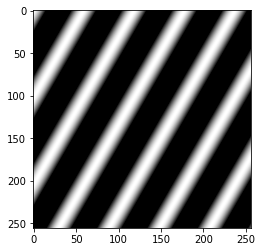

In [17]:
#Aufgabe 1b)
a = 1/0.2*np.cos(np.pi/6)
b = 1/0.2*np.sin(np.pi/6)
c = 0

cos_b = create_cos(256, a, b, c)
plt.imshow(cos_b, norm=plt.Normalize(0, 1), cmap='gray')

Aufgabe 1c)

Text(0.5, 1.0, 'c=0.75')

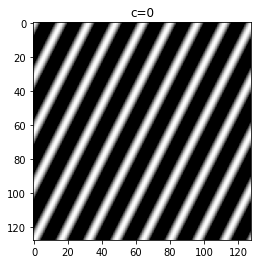

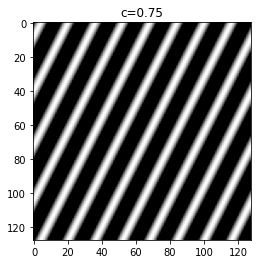

In [90]:
#Aufgabe 1c)
a = 8
b = 4
c1 = 0
cos_c1 = create_cos(128, a, b, c1)

plt.figure()
plt.imshow(cos_c1, norm=plt.Normalize(0, 1), cmap='gray')
plt.title("c="+str(c1))

c2 = 0.25
cos_c2 = create_cos(128, a, b, c2)
plt.figure()
plt.imshow(cos_c2, norm=plt.Normalize(0, 1), cmap='gray')
plt.title("c="+str(c2))

Text(0.5, 1.0, 'c=0.75 real')

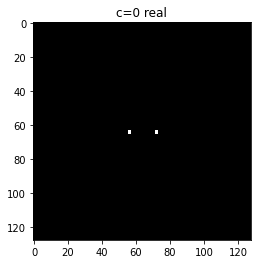

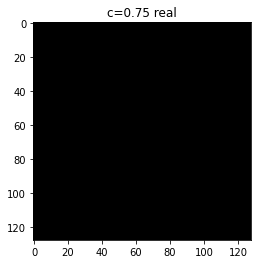

In [87]:
fft_cos_c1 = np.fft.fftshift(np.fft.fft2(cos_c1))
fft_cos_c_real1 = np.abs(np.real(fft_cos_c1))

plt.figure()
plt.imshow(fft_cos_c_real1, norm=plt.Normalize(0, 1), cmap='gray')
plt.title("c="+str(c1) +" real")

fft_cos_c2 = np.fft.fftshift(np.fft.fft2(cos_c2))
fft_cos_c_real2 = np.abs(np.real(fft_cos_c2))

plt.figure()
plt.imshow(fft_cos_c_real2, norm=plt.Normalize(0, 1), cmap='gray')
plt.title("c="+str(c2) +" real")

Text(0.5, 1.0, 'c=0.75 imag')

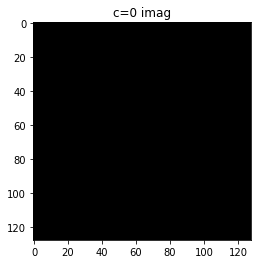

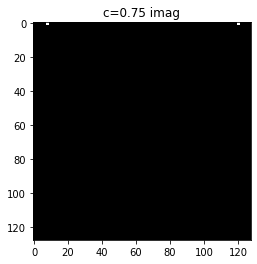

In [88]:
fft_cos_c1 = np.fft.fftshift(np.fft.fft2(cos_c1))
fft_cos_c_imag1 = np.abs(np.imag(fft_cos_c1))

plt.figure()
plt.imshow(fft_cos_c_imag1, norm=plt.Normalize(0, 1), cmap='gray')
plt.title("c="+str(c1) +" imag")

fft_cos_c2 = np.fft.fft2(cos_c2)
fft_cos_c_imag2 = np.abs(np.imag(fft_cos_c2))

plt.figure()
plt.imshow(fft_cos_c_imag2, norm=plt.Normalize(0, 1), cmap='gray')
plt.title("c="+str(c2) +" imag")

#TODO: fft plots in 2x2 subplot, erklärung als text einfügen

Aufgabe 1d) Angle = 0

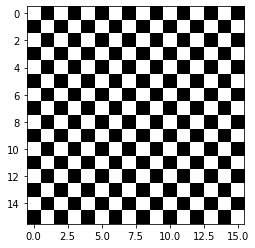

In [144]:
#Aufgabe 1d)
n = 16
# a = n/2
# b = n/2

a = n/2*np.cos(np.pi)
b = n/2*np.sin(np.pi/2)
c = 0
cos_d = create_cos(n, a, b, c)
plt.imshow(cos_d, norm=plt.Normalize(0, 1), cmap='gray')

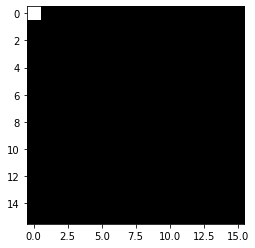

In [145]:
fft_cos_d =np.fft.fft2(cos_d)
fft_cos_d_real = np.abs(np.fft.fftshift(fft_cos_d))

plt.imshow(fft_cos_d_real, norm=plt.Normalize(0, 1), cmap='gray')

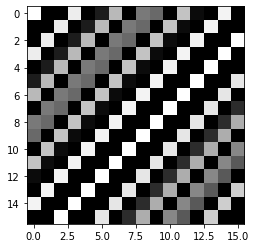

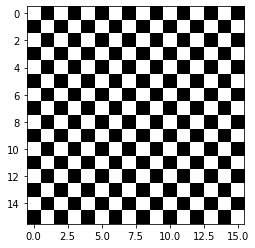

In [146]:
#Aufgabe 1d)
# a = 128*np.cos(np.pi)
# b = 128*np.sin(np.pi)

a = n/2
b = n/2

a = n/2*np.cos(np.pi/4)
b = n/2*np.sin(np.pi/4)
c = 0
cos_d = create_cos(n, a, b, c)
plt.figure()
plt.imshow(cos_d, norm=plt.Normalize(0, 1), cmap='gray')

a2 = n/2*np.sqrt(2)*np.cos(np.pi/4)
b2 = n/2*np.sqrt(2)*np.sin(np.pi/4)
c = 0
cos_d2 = create_cos(n, a2, b2, c)
plt.figure()
plt.imshow(cos_d2, norm=plt.Normalize(0, 1), cmap='gray')

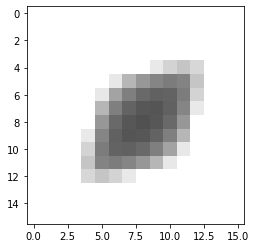

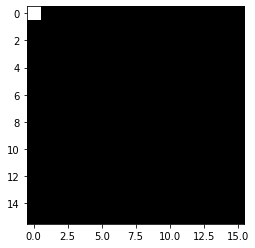

In [147]:
fft_cos_d =np.fft.fft2(cos_d)
fft_cos_d_real = np.abs(np.fft.fftshift(fft_cos_d))
plt.figure()
plt.imshow(fft_cos_d_real, norm=plt.Normalize(0, 1), cmap='gray')

fft_cos_d2 =np.fft.fft2(cos_d2)
fft_cos_d_real2 = np.abs(np.fft.fftshift(fft_cos_d2))

plt.figure()
plt.imshow(fft_cos_d_real2, norm=plt.Normalize(0, 1), cmap='gray')

Aufgabe 2a)

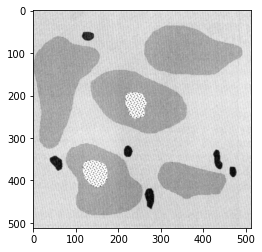

In [149]:
img = cv2.imread('data/how60c.tif', 0)
plt.imshow(np.abs(img), plt.cm.gray)

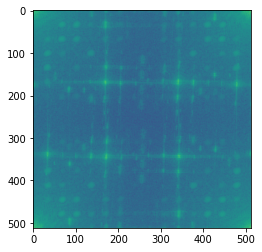

In [164]:
img_fft = np.fft.fft2(img)
img_fft_shift = np.fft.fftshift(img_fft)

plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))

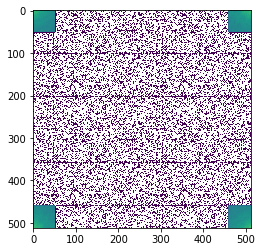

In [159]:

img_fft_filtered = img_fft.copy()
r,c = img_fft.shape
keep_fraction = 0.1
img_fft_filtered[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_fft_filtered[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.imshow(np.abs(img_fft_filtered), norm=LogNorm(vmin=5))


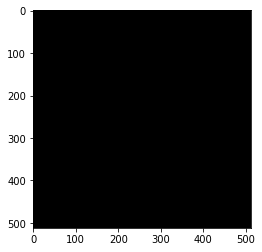

In [160]:
img_filtered = np.fft.ifft2(img_fft_filtered).real
plt.imshow(np.abs(img_fft_filtered), plt.cm.gray)

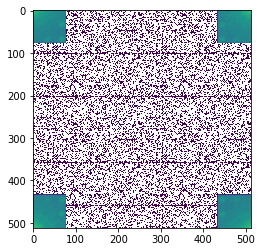

In [179]:
fft_sp = fftpack.fft2(img)
img_fft_filtered = fft_sp.copy()
r,c = fft_sp.shape
keep_fraction = 0.15
img_fft_filtered[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_fft_filtered[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.imshow(np.abs(img_fft_filtered), norm=LogNorm(vmin=5))



Text(0.5, 1.0, 'Reconstructed Image')

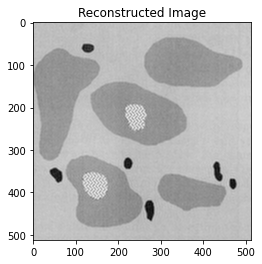

In [180]:
im_new = fftpack.ifft2(img_fft_filtered).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [181]:
noise = img - im_new
signal = (im_new.max()-im_new.min())/2

snr = signal/np.std(noise)
print("SNR: "+ str(snr))

SNR: 6.913615730161569
